# HEOM Tutorial 2: Computing Spectra

This tutorial demonstrates how to compute the dynamics of a 2-level quantum system interacting with a bath. The formalism for this is the Hierarchy of Equations of Motion (HEOM).


In [1]:
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt   # plots
#matplotlib.use('Agg')
#%matplotlib inline 

import numpy as np
#from matplotlib.mlab import griddata


if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
from libra_py import data_read
import libra_py.dynamics.heom.compute as compute
from libra_py import ft


plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, s

In [2]:
# Some reasonable values
J = 0.5 
Omega = 0.5*J



Ham = CMATRIX(3,3)
Ham.set(0, 0, 0.0+0.0j);  Ham.set(0, 1,  -J*(1.0+0.0j) );          Ham.set(0, 2,  -J*(1.0+0.0j) );
Ham.set(1, 0, -J*(1.0+0.0j));  Ham.set(1, 1,  Omega*(1.0+0.0j) );  Ham.set(1, 2,  -J*(1.0+0.0j) );
Ham.set(2, 0, -J*(1.0+0.0j));  Ham.set(2, 1,  -J*(1.0+0.0j) );     Ham.set(2, 2,  Omega*(1.0+0.0j) );

Q = CMATRIXList()
Q.append(CMATRIX(3,3))
Q.append(CMATRIX(3,3))
Q.append(CMATRIX(3,3))

Q[0].set(0,0, 1.0+0.0j )
Q[1].set(1,1, 1.0+0.0j )
Q[2].set(2,2, 1.0+0.0j )


rho = CMATRIX(3,3)
rho.set(0, 0, 1.0+0.0j) 


params = { "KK":3, "LL":5, 
           "gamma": 0.1 * J,
           "eta": 1.0 * J,
           "temperature": (J/(1.0 * units.kB)),
           "el_phon_couplings":Q,

           "dt":0.05, "nsteps":2000, 
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":10, "do_zeroing":0,
           "num_threads":12,

           "prefix":"out", 
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

In [3]:
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 0
 step= 200
 step= 200
 step= 400
 step= 400
 step= 600
 step= 600
 step= 800
 step= 800
 step= 1000
 step= 1000
 step= 1200
 step= 1200
 step= 1400
 step= 1400
 step= 1600
 step= 1600
 step= 1800
 step= 1800
Calculations took 245.05662989616394 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Print the computed results ( in the out/mem_data.hdf) as well as the reference results (in the rho.out file)

/home/alexey/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


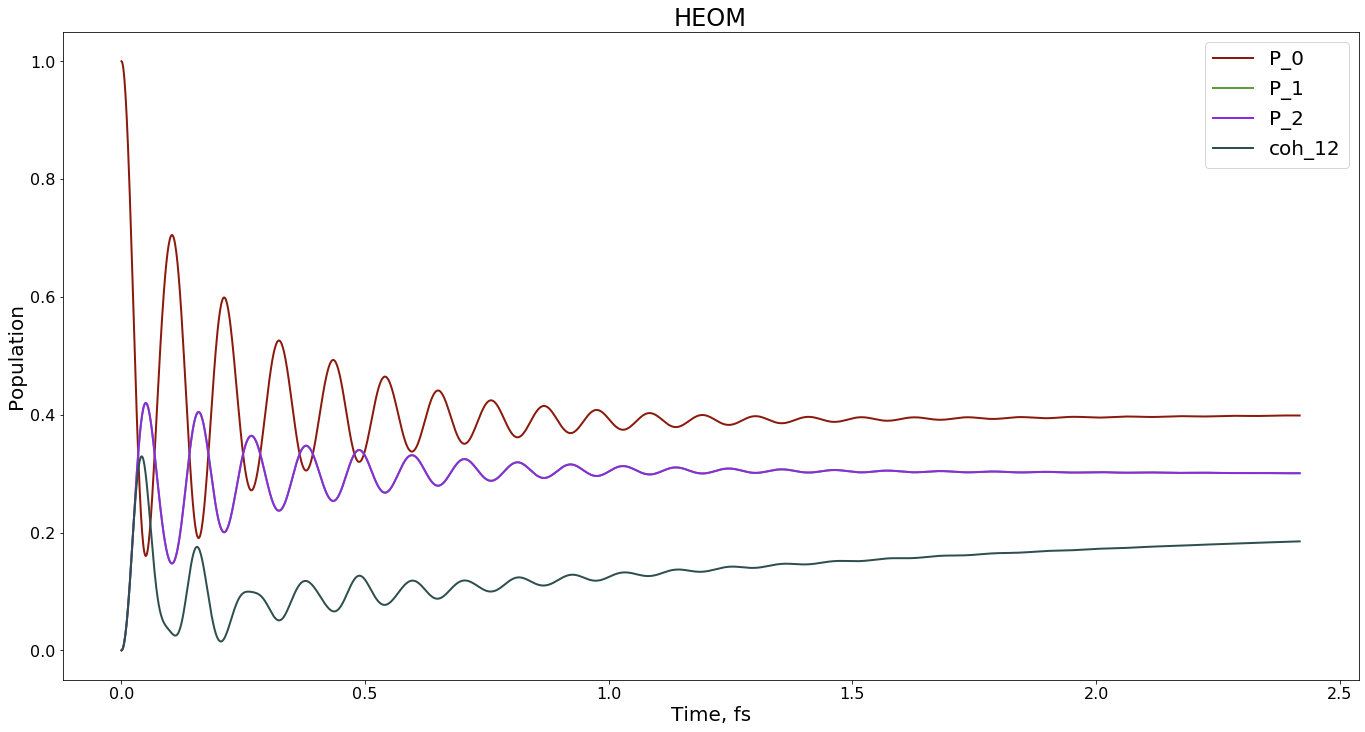

In [4]:
lib = [ None, None, None, None, None ]

with h5py.File(F"out/mem_data.hdf", 'r') as f:
    lib[0] = list(f["time/data"][:] * units.au2fs)
    lib[1] = list(f["denmat/data"][:, 0,0])
    lib[2] = list(f["denmat/data"][:, 1,1])
    lib[3] = list(f["denmat/data"][:, 2,2])
    lib[4] = list(f["denmat/data"][:, 1,2])

    
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('HEOM')
plt.xlabel('Time, fs')
plt.ylabel('Population')
plt.plot(lib[0], lib[1], label='P_0', linewidth=2, color = colors["11"]) 
plt.plot(lib[0], lib[2], label='P_1', linewidth=2, color = colors["21"]) 
plt.plot(lib[0], lib[3], label='P_2', linewidth=2, color = colors["31"]) 
plt.plot(lib[0], lib[4], label='coh_12', linewidth=2, color = colors["41"]) 
plt.legend()
plt.show()
plt.close()


We are now ready to compute the ACF of the system's dipole moment operator. 
In this type of calculations, one defines the initial values of the transition dipole matrix.
The time-evolution is described via the rho which is already printed in the file.

In this case, we just look at a 2-level example

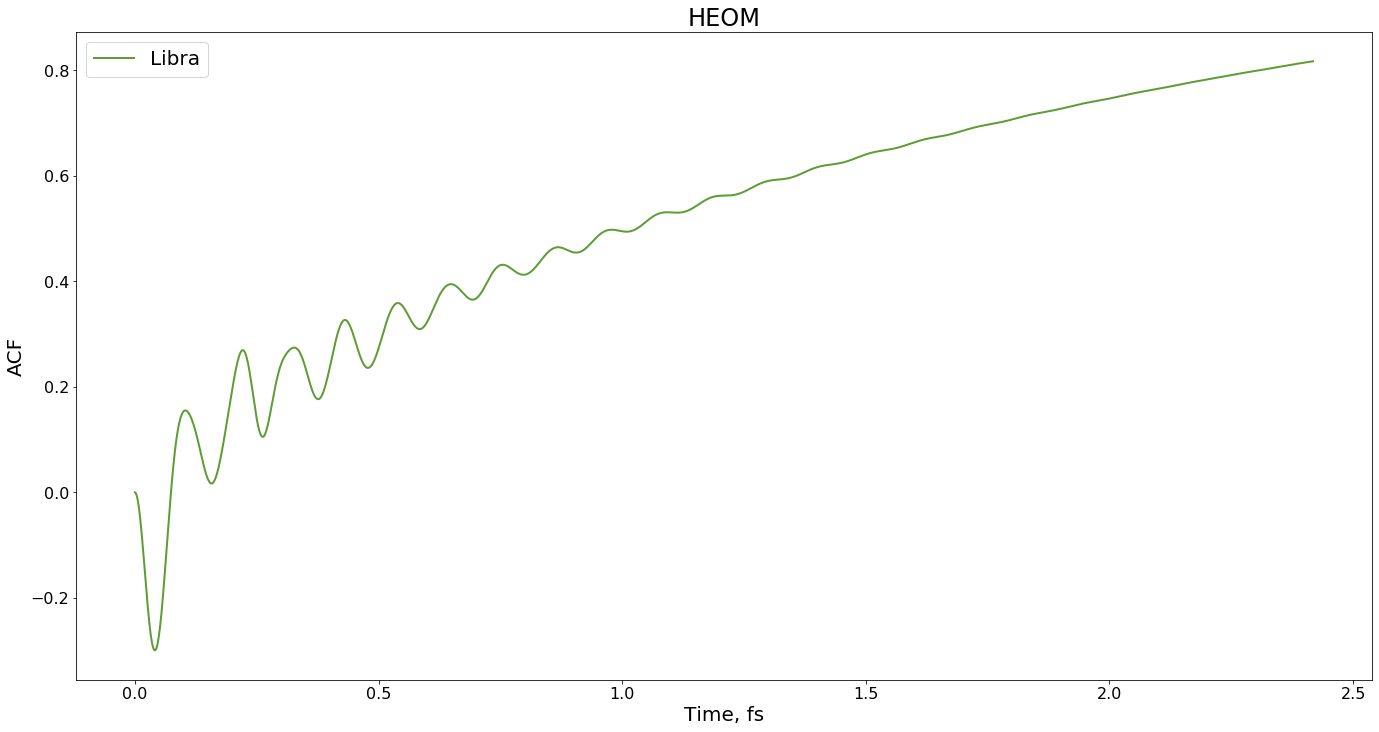

In [5]:
mu = CMATRIX(3,3)
mu.set(0,0, 0.0+0.0j);  mu.set(0,1, 1.0+0.0j);   mu.set(0,2, 1.0+0.0j); 
mu.set(1,0, 1.0+0.0j);  mu.set(1,1, 0.0+0.0j);   mu.set(1,2, 0.0+0.0j); 
mu.set(2,0, 1.0+0.0j);  mu.set(2,1, 0.0+0.0j);   mu.set(2,2, 0.0+0.0j); 


with h5py.File(F"out/mem_data.hdf", 'r') as f:
    lib[0] = list(f["time/data"][:] * units.au2fs)
    
    
    nsteps = f["denmat/data"].shape[0]
    acf = []
    
    rho = CMATRIX(3,3)
    
    for step in range(nsteps):
        
        for i in range(f["denmat/data"].shape[1]):
            for j in range(f["denmat/data"].shape[2]):
                rho.set(i,j, f["denmat/data"][step, i,j] )
                
        ct = (mu * rho).tr().real
        acf.append(ct)
       
    
plt.figure(2, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('HEOM')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(lib[0], acf, label='Libra', linewidth=2, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

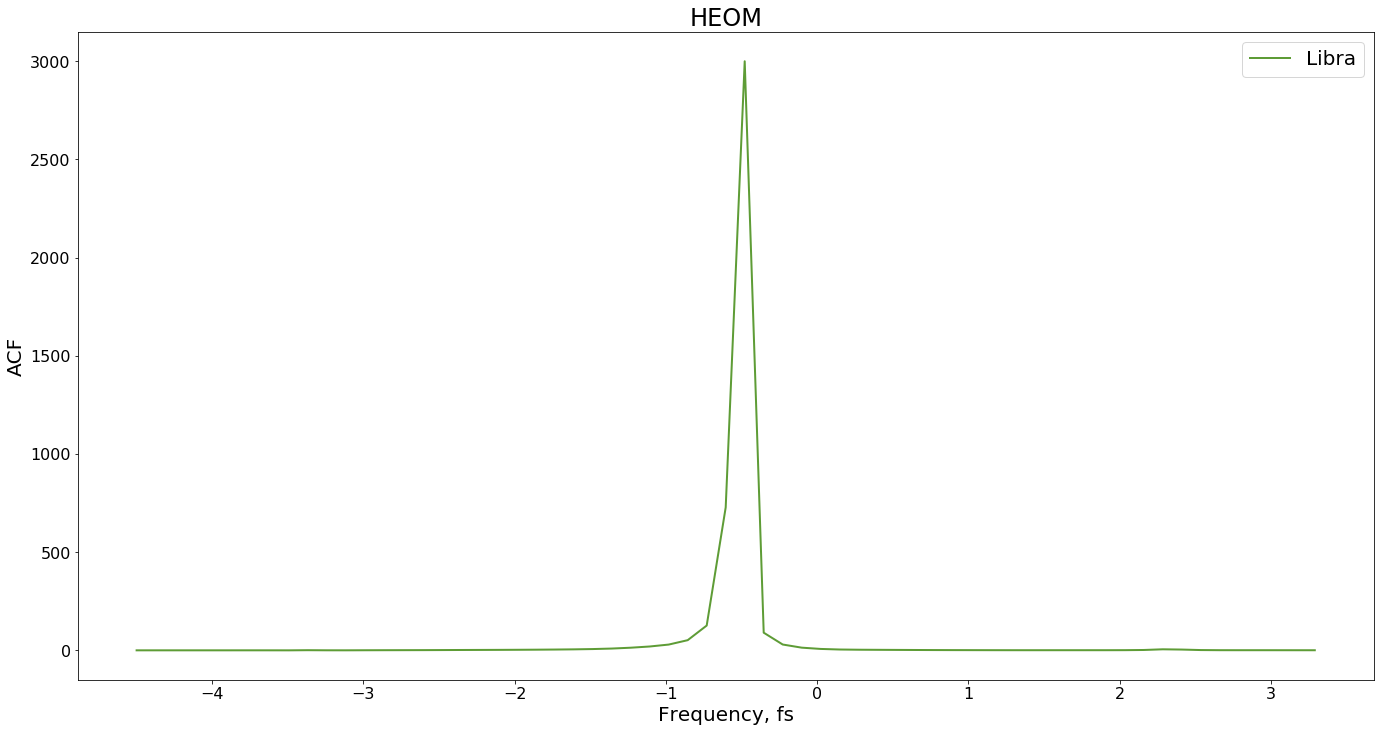

In [21]:
wmin = -4*J
wmax = 4*J


#dw = 2.0*math.pi/(params["dt"]*params["nsteps"]) #  0.1
dt = params["dt"]
dw = 2.0*math.pi/(params["dt"]*params["nsteps"]) #  0.1


W, ampl, I, ampl_re, ampl_im = ft.ft2(acf, wmin, wmax, dw, dt)

W_shifted = []
for w in W:
    W_shifted.append( (w-Omega)/J )


plt.figure(3, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('HEOM')
plt.xlabel('Frequency, fs')
plt.ylabel('ACF')
plt.plot(W_shifted, I, label='Libra', linewidth=2, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()